<div class="alert alert-vlock alert-info"> How to analyse customer churn </div>

<div class="alert alert-vlock alert-info"> Importing libraries </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, log_loss

pd.set_option('display.max_columns', None)

<div class="alert alert-vlock alert-info"> Loading the dataset </div>

In [2]:
data = pd.read_csv("telco.csv")  
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<div class="alert alert-vlock alert-info"> Exploring the dataset </div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.shape

(7043, 21)

In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data.dropna(inplace=True)

<div class="alert alert-vlock alert-info"> Plotting the distribution of churn vs. non-churn customers </div>

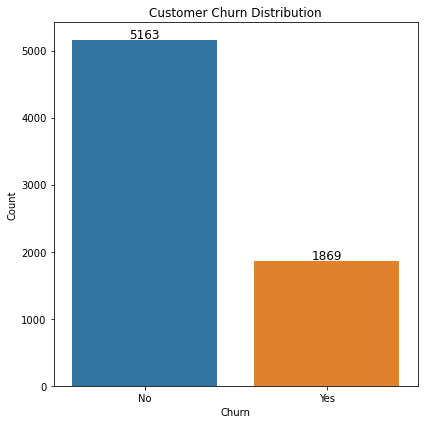

In [6]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=data, x='Churn')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig("customerchurndistribution.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Plotting the distribution of numeric features (tenure, MonthlyCharges, and TotalCharges) for the entire dataset </div>

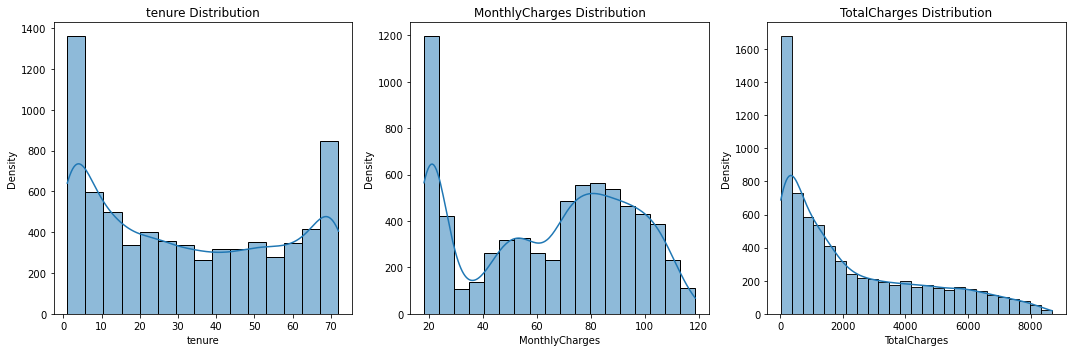

In [8]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.savefig("customerchurnnumeric.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Plotting the distribution of categorical features (gender, SeniorCitizen, Partner, Dependents, Contract, PaymentMethod) split by churn status </div>

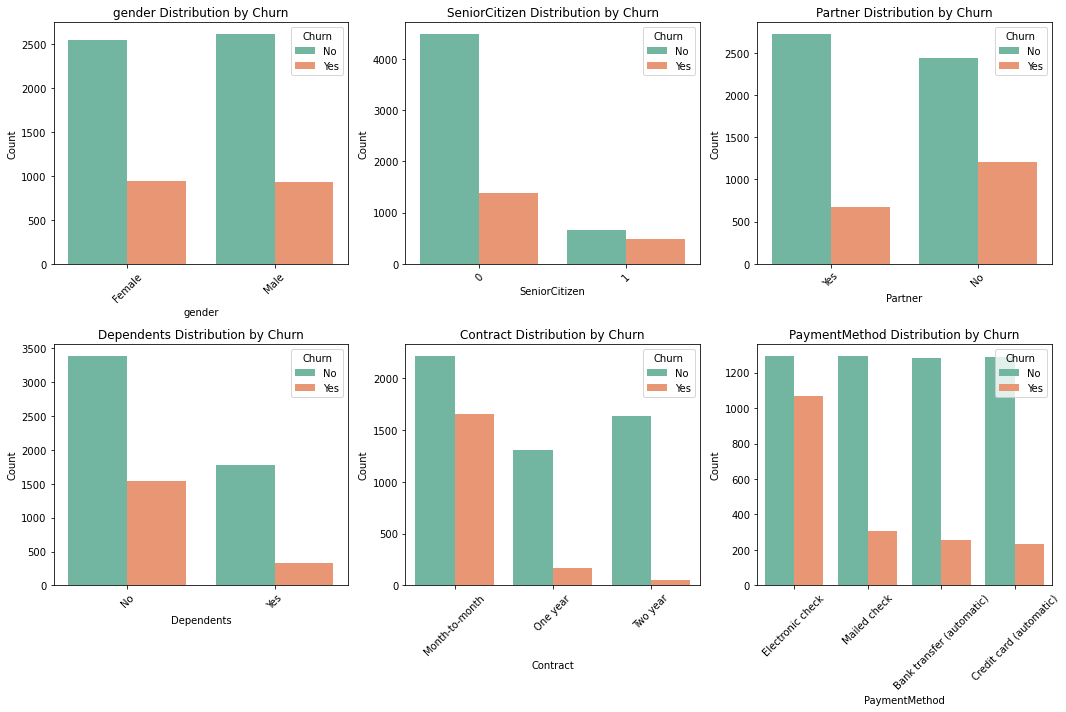

In [11]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, hue='Churn', palette='Set2')
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("factorchurndistribution.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Plotting the heatmap which displays the correlation between numeric features in the dataset. </div>

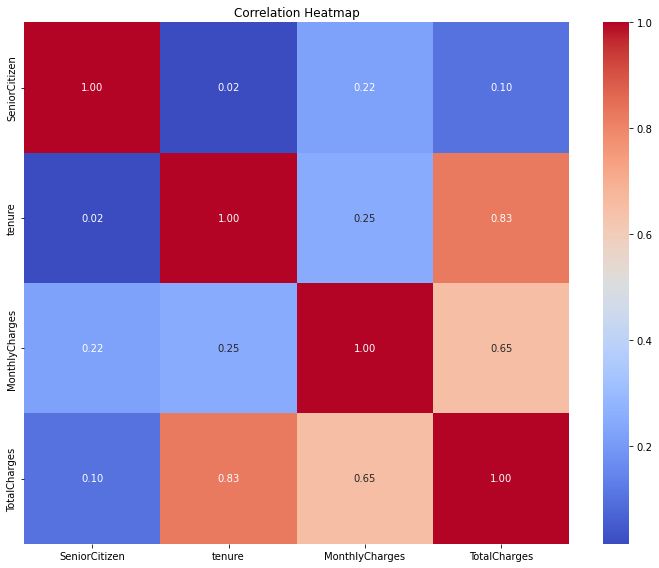

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(method='pearson', min_periods=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.savefig("churnheatmap.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Plottig the scatterplot which shows the relationship between Monthly Charges and Total Charges, with points colored by churn status </div>

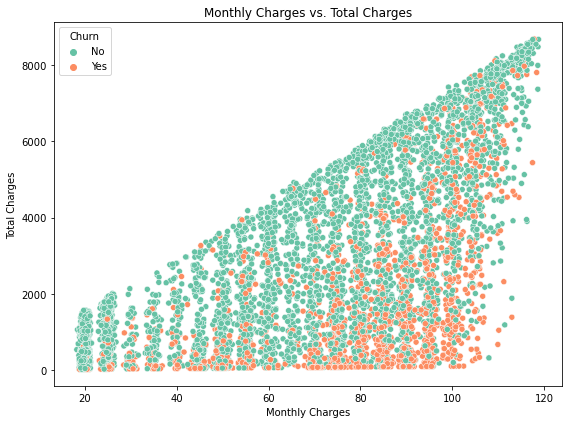

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set2')
plt.title("Monthly Charges vs. Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")


plt.tight_layout()
plt.savefig("churnscatterplot.png", bbox_inches='tight')
plt.show()

<div class="alert alert-vlock alert-info"> Results </div>

Results from the exlploratory data analysis:

Customer churn measures the metrics when customers stop using the service/product.

Consequences are usually that sales decreases and you have to note that acquiring a new customer is more expensive than maintaining a customer.

It is also important to get feedback that why customers leave.

Churned/all customers = Churn rate %

Histogram analysis shows the distribution in terms of time and payments.
Categorical analysis shows the distribution by gender, seniority, contract, demographic factors, contract type and payment method.

To sum up:

Customers with higher total fees are less likely to leave the customer base.

Long-term customers who pay more than average are loyal.

That's why it's important to reward long-term customers with incentives and other reward methods.